In [1]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import gcf
import seaborn as sns
import scipy.stats
from scipy.stats import gaussian_kde
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy import stats
import urllib.request
import mdtraj as md
import scipy as sp
import math
sns.set_style("darkgrid")

In [2]:
os.chdir('../..')
cwd = os.getcwd()
DATA_PATH_ROOT = cwd

## P61626 1gbz

In [11]:
# Load data
DATA_PATH_MUT_AF2 = DATA_PATH_ROOT + '/data/results_rmsd/results_rmsd_af2/results_rmsd_1gbz_32_mut/'
DATA_PATH_WT_AF2 = DATA_PATH_ROOT + '/data/results_rmsd/results_rmsd_af2/results_rmsd_1gbz_32_wt/'
DATA_PATH_PDB = DATA_PATH_ROOT + '/data/arodz12/pdbs_P61626/'
DATA_PATH_AF2 = DATA_PATH_ROOT + '/data/results_af2/P61626/'
arodz_pdbs = ['1kvb_' + str(i) for i in range(10)]

# AF2 muts to X-ray WT
af2_wt_rmsd_list = np.zeros((5,10))
dir_list = sorted(os.listdir(DATA_PATH_WT_AF2))
for j in range(len(dir_list)):
    df_tmp = pd.read_csv(DATA_PATH_WT_AF2 + dir_list[j])['name']
    df_tmp2 = pd.read_csv(DATA_PATH_WT_AF2 + dir_list[j])
    df_tmp2['model_n'] = list(df_tmp.str.extract(r'(model_)(\d)').iloc[:,1])
    df_tmp2 = df_tmp2.sort_values('model_n')
    ls = np.asarray(list(df_tmp2['rmsd']))
    for idx in range(af2_wt_rmsd_list.shape[0]):
        af2_wt_rmsd_list[idx,j] = ls[idx]

af2_wt_rmsd_list = np.asarray(af2_wt_rmsd_list)

# AF2 muts to X-ray muts
af2_mut_rmsd_list = np.zeros((5,10))
dir_list = sorted(os.listdir(DATA_PATH_MUT_AF2))
for j in range(len(dir_list)):
    df_tmp = pd.read_csv(DATA_PATH_MUT_AF2 + dir_list[j])['name']
    df_tmp2 = pd.read_csv(DATA_PATH_MUT_AF2 + dir_list[j])
    df_tmp2['model_n'] = list(df_tmp.str.extract(r'(model_)(\d)').iloc[:,1])
    df_tmp2 = df_tmp2.sort_values('model_n')
    ls = np.asarray(list(df_tmp2['rmsd']))
    for idx in range(af2_mut_rmsd_list.shape[0]):
        af2_mut_rmsd_list[idx,j] = ls[idx]

af2_mut_rmsd_list = np.asarray(af2_mut_rmsd_list)

(5, 10)

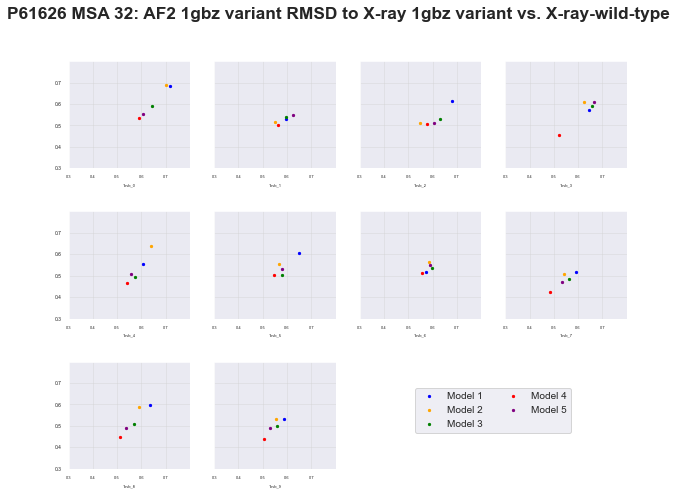

In [28]:
# Scatter plots of AF2 data vs. X-ray
N, M = 5, 10

colors = ['blue', 'orange', 'green', 'red', 'purple']
modelnames = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
plt.subplots(figsize = (10,7.5))
plt.subplots_adjust(hspace = 0.4)


for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    ax = plt.gca()
    ax.set_xticks(np.arange(0.3, 0.8, 0.1))
    ax.set_yticks(np.arange(0.3, 0.8, 0.1))
    plt.grid(axis="both", color = "lightgrey", alpha=0.5)
    for j in range(N):
        plt.scatter(af2_mut_rmsd_list[j,i], af2_wt_rmsd_list[j,i], color = colors[j], label = modelnames[j], s=5)
        plt.xlabel(arodz_pdbs[i], fontsize=4)
        plt.yticks(fontsize=5)
        plt.xticks(fontsize=4)
        plt.xlim(0.3,0.8)
        plt.ylim(0.3, 0.8)
    # Remove axis labels and tick for subplots not in left column
    if i % v != 0:
        ax = plt.gca()
        ax.set_xticks(np.arange(0.3, 0.8, 0.1))
        ax.set_yticks(np.arange(0.3, 0.8, 0.1))
        plt.grid(axis="both", color = "lightgrey", alpha=0.5)
        ax.tick_params(axis='y', colors=(0,0,0,0))

plt.legend(bbox_to_anchor=(2.3, 0.8), loc='upper center', ncol=2)
plt.suptitle("P61626 MSA 32: AF2 1gbz variant RMSD to X-ray 1gbz variant vs. X-ray-wild-type", fontsize = "xx-large", fontweight ="bold")
plt.savefig(DATA_PATH_ROOT + "/notebooks/figs/af_models_var_xray_vs_xray_wt_P61626_1gbz_msa32.pdf")

## P61626 1gft

In [29]:
# Load data
DATA_PATH_MUT_AF2 = DATA_PATH_ROOT + '/data/results_rmsd/results_rmsd_af2/results_rmsd_1gft_32_mut/'
DATA_PATH_WT_AF2 = DATA_PATH_ROOT + '/data/results_rmsd/results_rmsd_af2/results_rmsd_1gft_32_wt/'
DATA_PATH_PDB = DATA_PATH_ROOT + '/data/arodz12/pdbs_P61626/'
DATA_PATH_AF2 = DATA_PATH_ROOT + '/data/results_af2/P61626/'
arodz_pdbs = ['1kvb_' + str(i) for i in range(10)]

# AF2 muts to X-ray WT
af2_wt_rmsd_list = np.zeros((5,10))
dir_list = sorted(os.listdir(DATA_PATH_WT_AF2))
for j in range(len(dir_list)):
    df_tmp = pd.read_csv(DATA_PATH_WT_AF2 + dir_list[j])['name']
    df_tmp2 = pd.read_csv(DATA_PATH_WT_AF2 + dir_list[j])
    df_tmp2['model_n'] = list(df_tmp.str.extract(r'(model_)(\d)').iloc[:,1])
    df_tmp2 = df_tmp2.sort_values('model_n')
    ls = np.asarray(list(df_tmp2['rmsd']))
    for idx in range(af2_wt_rmsd_list.shape[0]):
        af2_wt_rmsd_list[idx,j] = ls[idx]

af2_wt_rmsd_list = np.asarray(af2_wt_rmsd_list)

# AF2 muts to X-ray muts
af2_mut_rmsd_list = np.zeros((5,10))
dir_list = sorted(os.listdir(DATA_PATH_MUT_AF2))
for j in range(len(dir_list)):
    df_tmp = pd.read_csv(DATA_PATH_MUT_AF2 + dir_list[j])['name']
    df_tmp2 = pd.read_csv(DATA_PATH_MUT_AF2 + dir_list[j])
    df_tmp2['model_n'] = list(df_tmp.str.extract(r'(model_)(\d)').iloc[:,1])
    df_tmp2 = df_tmp2.sort_values('model_n')
    ls = np.asarray(list(df_tmp2['rmsd']))
    for idx in range(af2_mut_rmsd_list.shape[0]):
        af2_mut_rmsd_list[idx,j] = ls[idx]

af2_mut_rmsd_list = np.asarray(af2_mut_rmsd_list)

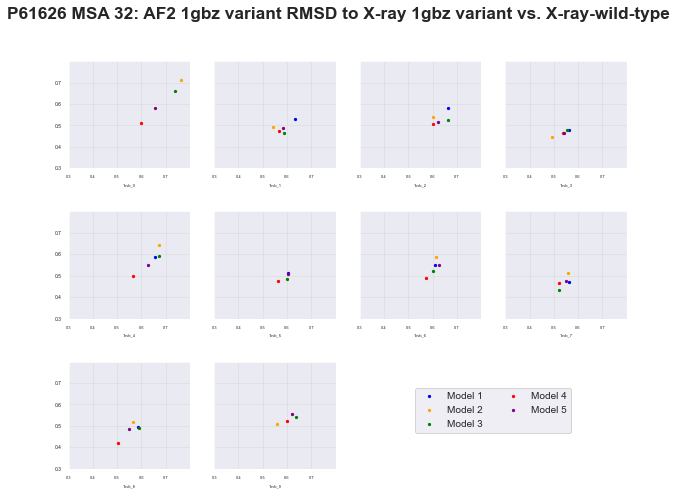

In [30]:
# Scatter plots of AF2 data vs. X-ray
N, M = 5, 10

colors = ['blue', 'orange', 'green', 'red', 'purple']
modelnames = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
plt.subplots(figsize = (10,7.5))
plt.subplots_adjust(hspace = 0.4)


for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    ax = plt.gca()
    ax.set_xticks(np.arange(0.3, 0.8, 0.1))
    ax.set_yticks(np.arange(0.3, 0.8, 0.1))
    plt.grid(axis="both", color = "lightgrey", alpha=0.5)
    for j in range(N):
        plt.scatter(af2_mut_rmsd_list[j,i], af2_wt_rmsd_list[j,i], color = colors[j], label = modelnames[j], s=5)
        plt.xlabel(arodz_pdbs[i], fontsize=4)
        plt.yticks(fontsize=5)
        plt.xticks(fontsize=4)
        plt.xlim(0.3,0.8)
        plt.ylim(0.3, 0.8)
    # Remove axis labels and tick for subplots not in left column
    if i % v != 0:
        ax = plt.gca()
        ax.set_xticks(np.arange(0.3, 0.8, 0.1))
        ax.set_yticks(np.arange(0.3, 0.8, 0.1))
        plt.grid(axis="both", color = "lightgrey", alpha=0.5)
        ax.tick_params(axis='y', colors=(0,0,0,0))

plt.legend(bbox_to_anchor=(2.3, 0.8), loc='upper center', ncol=2)
plt.suptitle("P61626 MSA 32: AF2 1gbz variant RMSD to X-ray 1gbz variant vs. X-ray-wild-type", fontsize = "xx-large", fontweight ="bold")
plt.savefig(DATA_PATH_ROOT + "/notebooks/figs/af_models_var_xray_vs_xray_wt_P61626_1gft_msa32.pdf")